In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [2]:
df = pd.read_csv('data/일별평균대기오염도_2022(에어코리아).csv', encoding='cp949')
df

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20220101,강남구,0.029,0.014,0.5,0.003,25.0,12.0
1,20220101,홍릉로,0.038,0.009,0.6,0.004,27.0,16.0
2,20220101,행주,0.034,0.012,0.7,0.004,27.0,16.0
3,20220101,항동,0.030,0.011,0.5,0.003,27.0,14.0
4,20220101,한강대로,0.037,0.011,0.6,0.003,34.0,14.0
...,...,...,...,...,...,...,...,...
18245,20221231,구로구,0.037,0.009,0.5,0.004,43.0,29.0
18246,20221231,광진구,0.026,0.005,0.8,0.003,44.0,34.0
18247,20221231,관악산,0.008,0.038,0.3,0.005,29.0,18.0
18248,20221231,관악구,0.045,0.009,0.7,0.003,42.0,28.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          18250 non-null  int64  
 1   측정소명          18250 non-null  object 
 2   이산화질소농도(ppm)  18172 non-null  float64
 3   오존농도(ppm)     18176 non-null  float64
 4   일산화탄소농도(ppm)  18174 non-null  float64
 5   아황산가스농도(ppm)  18176 non-null  float64
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.1+ MB


In [4]:
# 측정일시 컬럼을 날짜형으로 변환
df['측정일시'] = df['측정일시'].astype(str)
df['측정일시'] = df['측정일시'].str[:4] + '-' + df['측정일시'].str[4:6] + '-' + df['측정일시'].str[6:]

In [5]:
df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,2022-01-01,강남구,0.029,0.014,0.5,0.003,25.0,12.0
1,2022-01-01,홍릉로,0.038,0.009,0.6,0.004,27.0,16.0
2,2022-01-01,행주,0.034,0.012,0.7,0.004,27.0,16.0
3,2022-01-01,항동,0.030,0.011,0.5,0.003,27.0,14.0
4,2022-01-01,한강대로,0.037,0.011,0.6,0.003,34.0,14.0


In [10]:
df['측정일시'] = pd.to_datetime(df['측정일시'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   측정일시          18250 non-null  datetime64[ns]
 1   측정소명          18250 non-null  object        
 2   이산화질소농도(ppm)  18172 non-null  float64       
 3   오존농도(ppm)     18176 non-null  float64       
 4   일산화탄소농도(ppm)  18174 non-null  float64       
 5   아황산가스농도(ppm)  18176 non-null  float64       
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64       
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.1+ MB


In [11]:
df['측정소명'].unique()

array(['강남구', '홍릉로', '행주', '항동', '한강대로', '청계천로', '천호대로', '중랑구', '중구',
       '종로구', '종로', '정릉로', '자연사박물관', '은평구', '용산구', '올림픽공원', '영등포로',
       '영등포구', '양천구', '신촌로', '시흥대로', '송파구', '세곡', '성북구', '성동구', '화랑로',
       '서초구', '서울숲', '서대문구', '북한산', '마포아트센터', '마포구', '동작대로', '동작구',
       '동대문구', '도산대로', '도봉구', '노원구', '남산', '금천구', '구로구', '광진구', '관악산',
       '관악구', '공항대로', '강서구', '강북구', '강변북로', '강동구', '강남대로'], dtype=object)

In [25]:
df_flt = df.loc[df['측정소명']=='공항대로']
df_flt.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
44,2022-01-01,공항대로,0.035,0.010,0.6,0.002,31.0,15.0
93,2022-01-02,공항대로,0.027,0.017,0.5,0.003,37.0,22.0
143,2022-01-03,공항대로,0.041,0.007,0.6,0.003,31.0,18.0
196,2022-01-04,공항대로,0.032,0.010,0.5,0.003,48.0,21.0
244,2022-01-05,공항대로,0.045,0.004,0.8,0.003,56.0,34.0


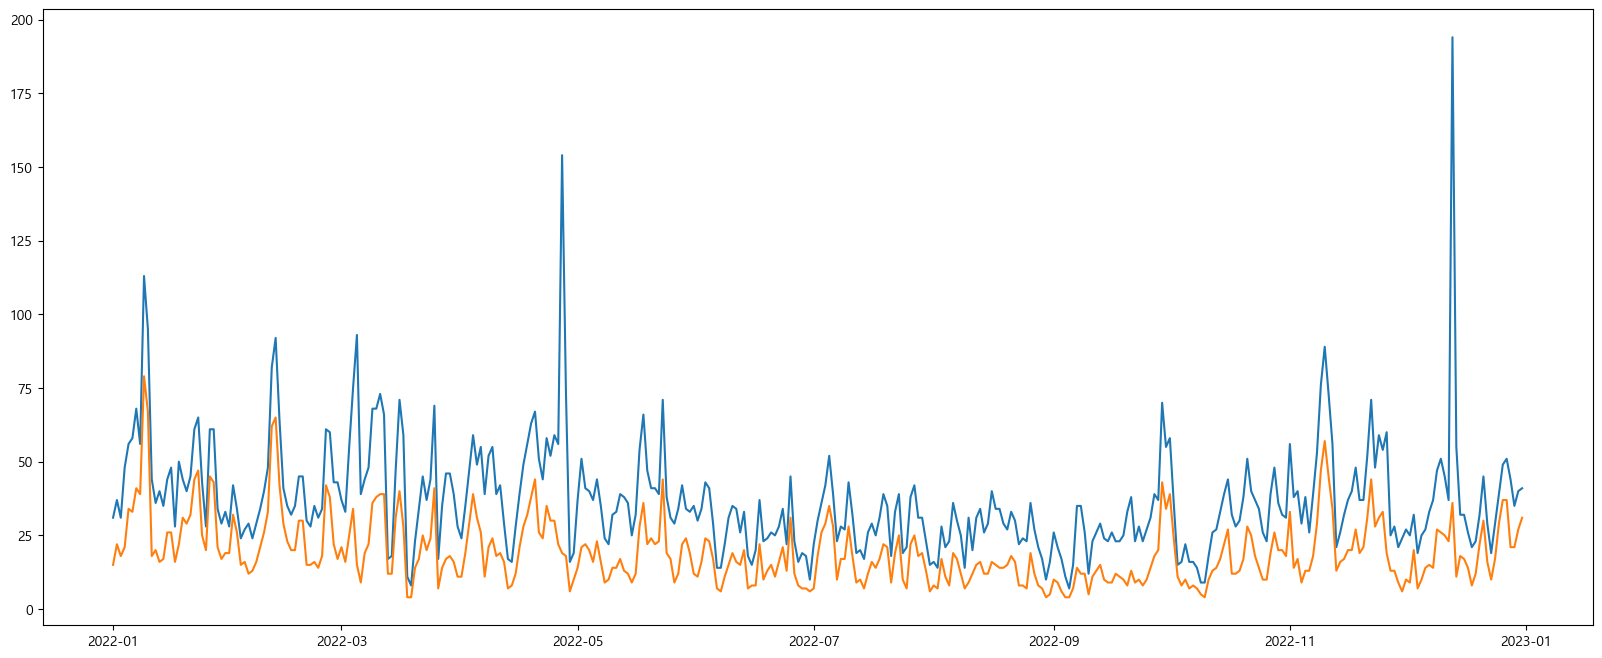

In [26]:
plt.figure(figsize=(20,8))
plt.plot(df_fit['측정일시'], df_fit['미세먼지농도(㎍/㎥)'], label='미세먼지')
plt.plot(df_fit['측정일시'], df_fit['초미세먼지농도(㎍/㎥)'], label='초미세먼지')
plt.show()

In [33]:
df_flt2 = df_flt[['측정일시', '미세먼지농도(㎍/㎥)']]
df_flt2.columns=['측정일시', '미세먼지농도']
df_flt3 = df_flt2.set_index('측정일시')
df_flt3.head()

,미세먼지농도
측정일시,
2022-01-01,31.0
2022-01-02,37.0
2022-01-03,31.0
2022-01-04,48.0
2022-01-05,56.0


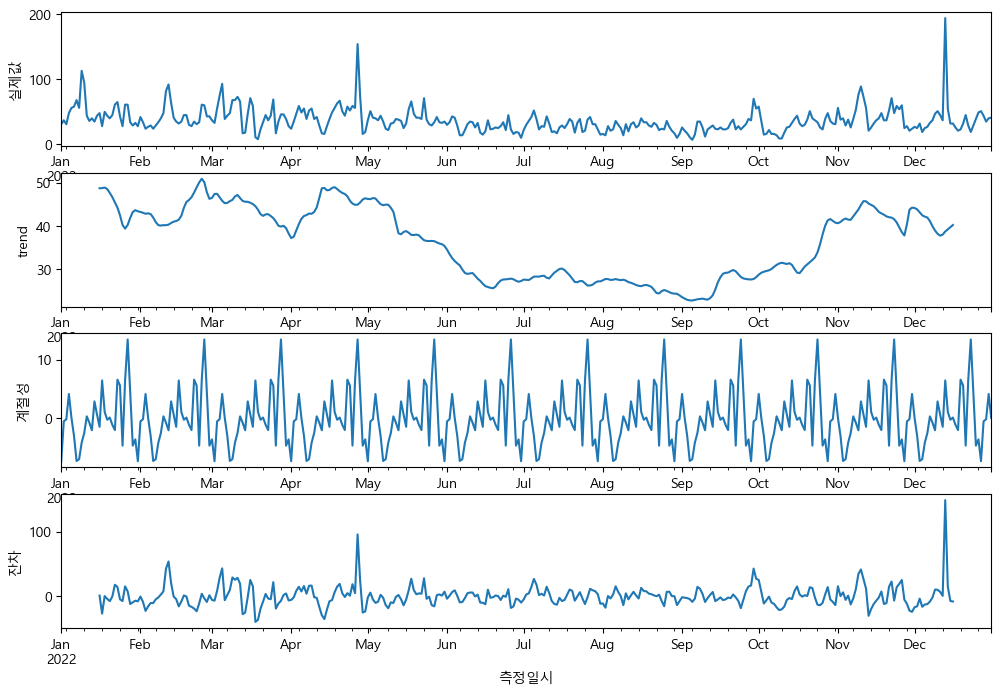

In [42]:
# trend 추세, 계절성,  실제값
result = seasonal_decompose(df_flt3['미세먼지농도'],
                           period=30, # 30일 단위로 계절성을 분석
                           model='additive' # 계절성, 추세를 잔차를 덧셈에의해 분석
                           )
fig, axes = plt.subplots(4, 1, figsize=(12,8))
result.observed.plot(ax=axes[0]) # 실제값
axes[0].set_ylabel('실제값')
result.trend.plot(ax=axes[1])
axes[1].set_ylabel('trend')
result.seasonal.plot(ax=axes[2])
axes[2].set_ylabel('계절성')
result.resid.plot(ax=axes[3])
axes[3].set_ylabel('잔차')
plt.show()

In [49]:
# facebook에서 개발한 시계열 예측 라이브러리
# pip install prophet 
from prophet import Prophet
df_flt2.columns = ['ds','y']
df_flt2.head()

,ds,y
44,2022-01-01,31.0
93,2022-01-02,37.0
143,2022-01-03,31.0
196,2022-01-04,48.0
244,2022-01-05,56.0


In [50]:
p = Prophet()
p.fit(df_flt2)

16:38:23 - cmdstanpy - INFO - Chain [1] start processing
16:38:23 - cmdstanpy - INFO - Chain [1] done processing


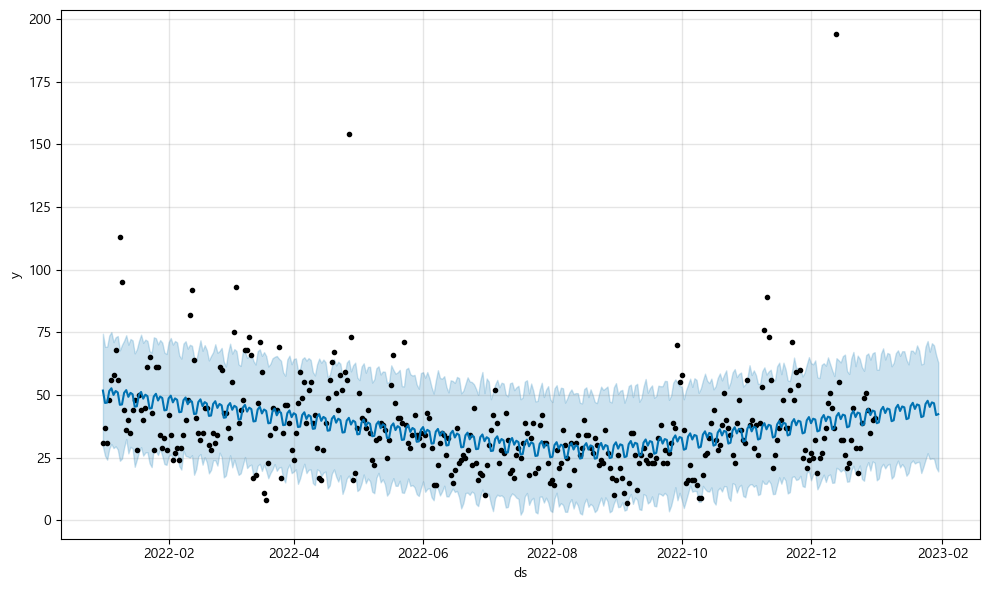

In [52]:
future = p.make_future_dataframe(periods=30) # 30일 이후의 데이터를 예측
forecast = p.predict(future)
f = p.plot(forecast)

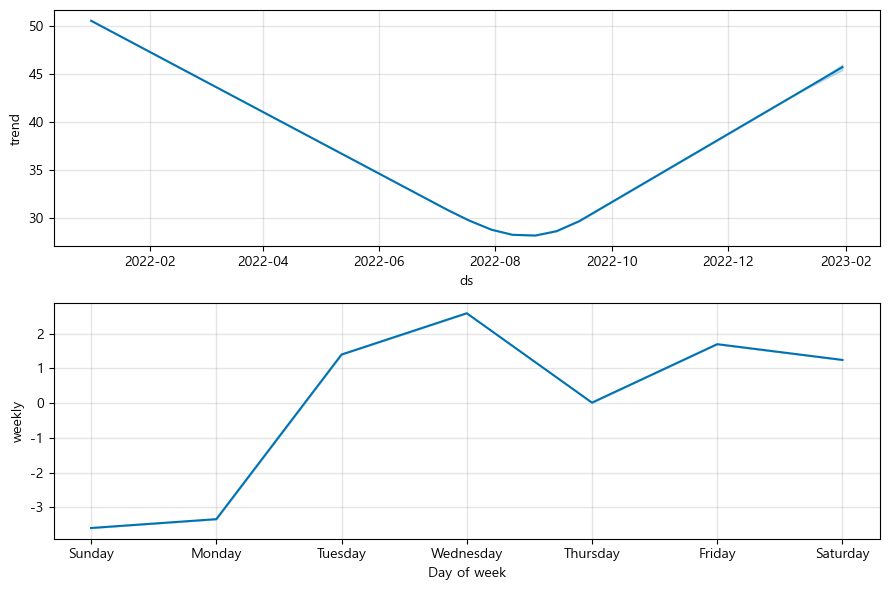

In [53]:
f2 = p.plot_components(forecast) # 트랜드와 휴일 효과 그래프

In [54]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,50.526912,29.399216,74.432581,50.526912,50.526912,1.243531,1.243531,1.243531,1.243531,1.243531,1.243531,0.0,0.0,0.0,51.770443
1,2022-01-02,50.421588,25.725750,69.209853,50.421588,50.421588,-3.597541,-3.597541,-3.597541,-3.597541,-3.597541,-3.597541,0.0,0.0,0.0,46.824047
2,2022-01-03,50.316264,24.184729,69.314410,50.316264,50.316264,-3.343116,-3.343116,-3.343116,-3.343116,-3.343116,-3.343116,0.0,0.0,0.0,46.973148
3,2022-01-04,50.210940,28.569582,73.746852,50.210940,50.210940,1.399017,1.399017,1.399017,1.399017,1.399017,1.399017,0.0,0.0,0.0,51.609957
4,2022-01-05,50.105616,30.432436,75.086404,50.105616,50.105616,2.588193,2.588193,2.588193,2.588193,2.588193,2.588193,0.0,0.0,0.0,52.693810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2023-01-26,45.238005,24.490358,67.298665,44.995904,45.467013,0.012786,0.012786,0.012786,0.012786,0.012786,0.012786,0.0,0.0,0.0,45.250791
391,2023-01-27,45.354100,24.692439,70.665336,45.095749,45.600573,1.697130,1.697130,1.697130,1.697130,1.697130,1.697130,0.0,0.0,0.0,47.051230
392,2023-01-28,45.470194,24.603863,69.813911,45.196782,45.733898,1.243531,1.243531,1.243531,1.243531,1.243531,1.243531,0.0,0.0,0.0,46.713725
393,2023-01-29,45.586288,21.126214,65.986488,45.295186,45.865930,-3.597541,-3.597541,-3.597541,-3.597541,-3.597541,-3.597541,0.0,0.0,0.0,41.988748


In [56]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
365,2023-01-01,38.738106,15.963810,60.143599
366,2023-01-02,39.108625,16.727276,60.156020
367,2023-01-03,43.966852,21.179901,66.511925
368,2023-01-04,45.272123,22.540972,68.629085
369,2023-01-05,42.812810,20.728669,64.170124
370,2023-01-06,44.613248,22.080273,66.781090
371,2023-01-07,44.275744,22.555375,66.393218
372,2023-01-08,39.550766,16.645925,61.472066
373,2023-01-09,39.921285,17.633129,62.804642
374,2023-01-10,44.779513,21.830762,66.716828


In [60]:
forecast.loc[forecast['ds']=='2023-01-15', ['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
379,2023-01-15,40.363427,17.797538,64.05737
